In [7]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

<Axes: >

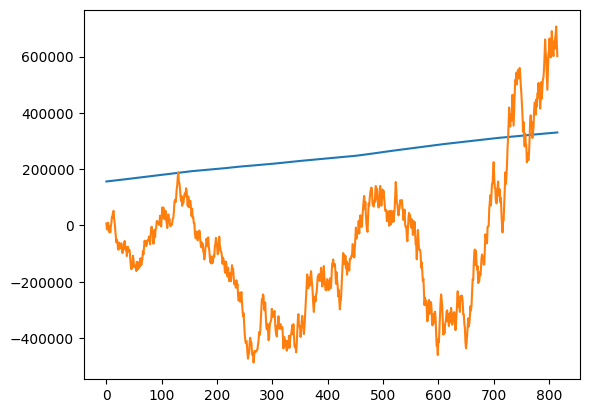

In [8]:
# Generate some 'interesting' data with more variation from population set

df = pd.read_csv('POP.csv')
df['value'].plot()

random.seed(0)
rand_scale = [random.random()/5 for _ in range(len(df['value']))]
rand_increm = [rand_scale.pop()]
rand_addsub = random.choices([True, False],weights=[1.1, 1],k=len(rand_scale))
for t in rand_addsub:
    v = rand_scale.pop()
    if t:
        rand_increm.append(v+rand_increm[-1])#*(1+v))
    else:
        rand_increm.append(-v+rand_increm[-1])#*(1-v))

df['value_2'] = df['value'] * rand_increm
df['value_2'].plot()


Order	R^2	RSE		RSS
1	0.14	233402.48	44344049165066.39
2	0.51	176792.05	25410662996867.74
3	0.55	168508.50	23056834255978.54
4	0.57	164208.24	21868083897959.46
5	0.68	144057.88	16809665480680.98
6	0.70	139030.71	15637596962542.06


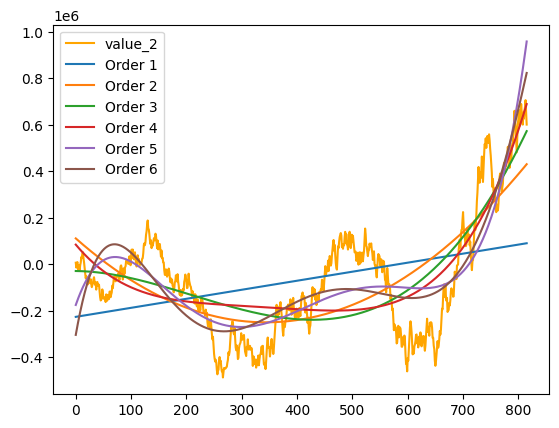

In [9]:
## Linear Regression with adjustable Order / Degree
## Fitting Data to a Polynomial

dataset = df['value_2']
model_samples = len(dataset)-1

x = np.array(df.index)
y = np.array(dataset)

print(f'Order\tR^2\tRSE\t\tRSS')
dataset.plot(color='orange')
for order in [1,2,3,4,5,6]:

    # Linear regression using least squares method
    coeffs, residuals, _, _, _ = np.polyfit(x[:model_samples], y[:model_samples], order, full=True)

    # Either of the following will return R_Squared valeu
    R_squared = 1 - residuals / sum((y - y.mean())**2)
    R_squared = 1 - residuals / (len(y) * y.var())

    # Calculate the predicted values
    coeffs = coeffs.tolist()
    coeffs.reverse()

    # y_pred = 0
    # for i,c in enumerate(coeffs):
    #     y_pred += c * x ** (i)
    # Add each term in the polynomial to get the predicted value (sum(coeff * x^i))
    y_pred = sum([coeff * x ** (exponent) for exponent,coeff in enumerate(coeffs)])

    df['linreg_pred'] = y_pred
    df['linreg_pred'].plot(label=f'Order {order}')
    plt.legend()
    rss = sum((df['linreg_pred'] - dataset)**2)
    dfresiduals = len(df['linreg_pred']) - order - 1 
    rse = (rss/dfresiduals)**0.5
    
    print(f'{order}\t{R_squared[0]:.2f}\t{rse:.2f}\t{rss:.2f}')#\t{coeffs}')
    

Order	R^2	RSE		RSS
1	1.00	4443.46	16071920099.97
2	1.00	19501.82	309200920008.88
3	1.00	12889.73	134909873786.23


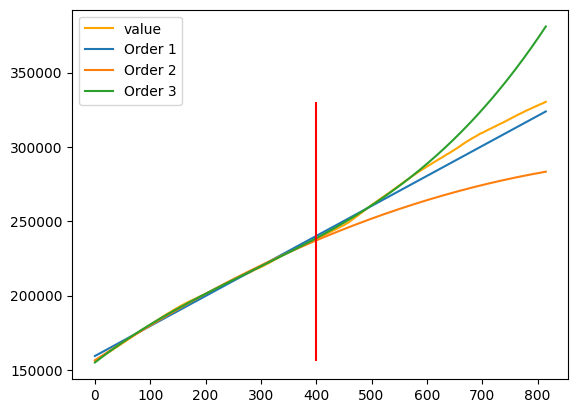

In [10]:
## Linear Regression with adjustable Order / Degree
## Predicting Data with a Polynomial

dataset = df['value']
model_samples = 400

x = np.array(df.index)
y = np.array(dataset)

print(f'Order\tR^2\tRSE\t\tRSS')
dataset.plot(color='orange')
for order in [1,2,3]:

    # Linear regression using least squares method
    coeffs, residuals, _, _, _ = np.polyfit(x[:model_samples], y[:model_samples], order, full=True)

    # Either of the following will return R_Squared valeu
    R_squared = 1 - residuals / sum((y - y.mean())**2)
    R_squared = 1 - residuals / (len(y) * y.var())

    # Calculate the predicted values
    coeffs = coeffs.tolist()
    coeffs.reverse()

    # y_pred = 0
    # for i,c in enumerate(coeffs):
    #     y_pred += c * x ** (i)
    # Add each term in the polynomial to get the predicted value (sum(coeff * x^i))
    y_pred = sum([coeff * x ** (exponent) for exponent,coeff in enumerate(coeffs)])

    df['linreg_pred'] = y_pred
    df['linreg_pred'].plot(label=f'Order {order}')
    rss = sum((df['linreg_pred'] - dataset)**2)
    dfresiduals = len(df['linreg_pred']) - order - 1 
    rse = (rss/dfresiduals)**0.5
    
    print(f'{order}\t{R_squared[0]:.2f}\t{rse:.2f}\t{rss:.2f}')#\t{coeffs}')
plt.legend()
plt.vlines([model_samples],dataset.min(),dataset.max(),color='red',label='End of Training Data')
    